In [1]:
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import string
import seaborn as sns

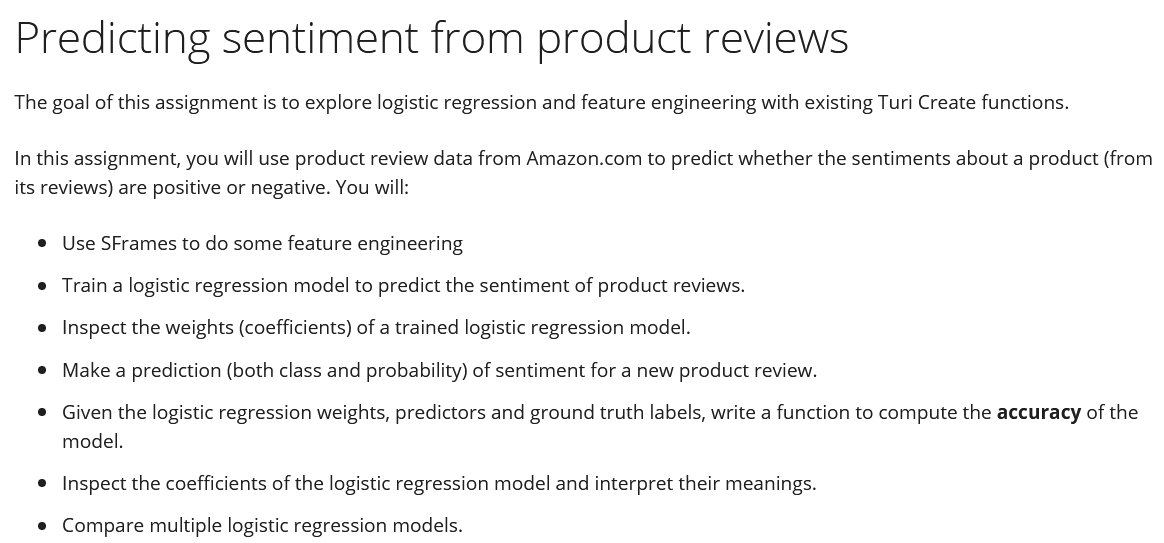

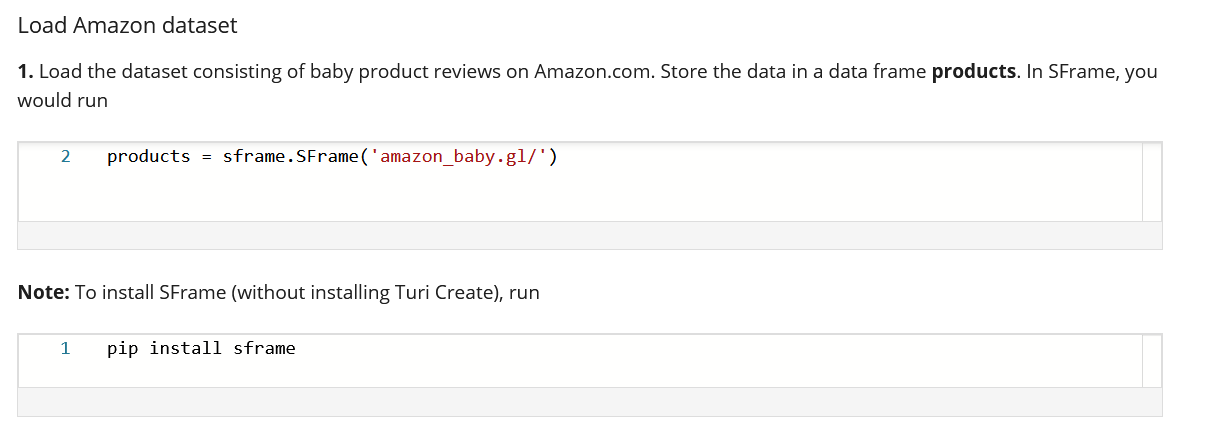

In [2]:
products = pd.read_csv('../data_sets/amazon_baby.csv')
products.head()

,name,review,rating
0,Planetwise Flannel Wipes,"These flannel wipes are OK, but in my opinion ...",3
1,Planetwise Wipe Pouch,it came early and was not disappointed. i love...,5
2,Annas Dream Full Quilt with 2 Shams,Very soft and comfortable and warmer than it l...,5
3,Stop Pacifier Sucking without tears with Thumb...,This is a product well worth the purchase. I ...,5
4,Stop Pacifier Sucking without tears with Thumb...,All of my kids have cried non-stop when I trie...,5


In [3]:
products.describe()

,rating
count,183531.000000
mean,4.120448
std,1.285017
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


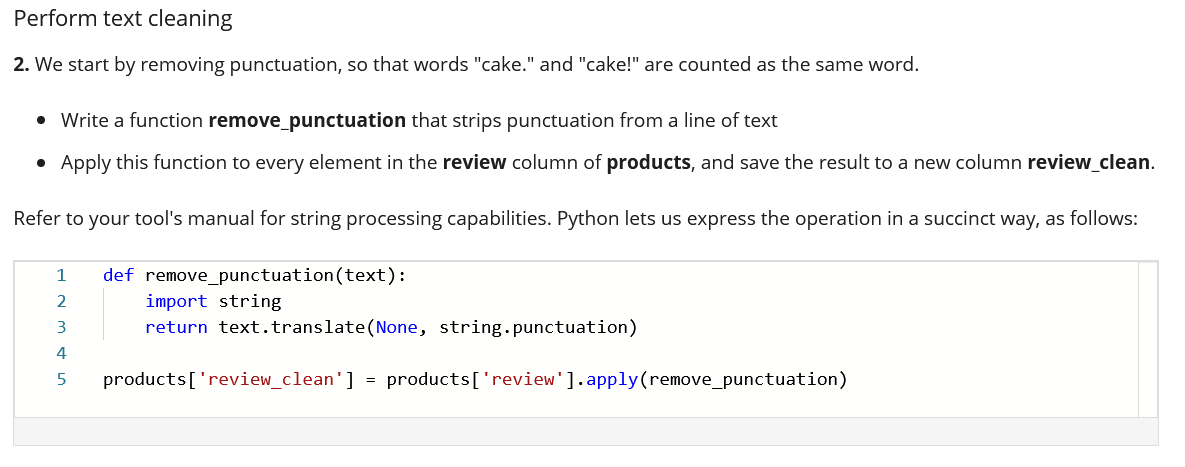

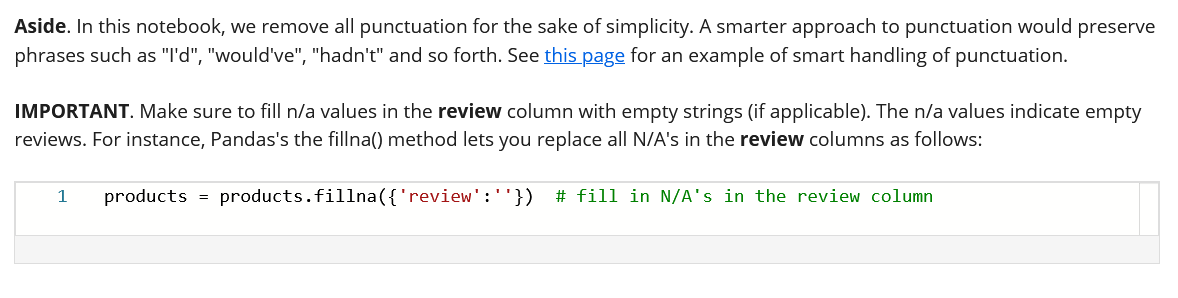

In [4]:
print(string.punctuation)

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


In [5]:
def remove_punctuation(text):
    ## if the above punctuations are present it will be removed and replaced with NaN values
    mapping = str.maketrans(' ' , ' ' , string.punctuation)
    return text.translate(mapping)

In [6]:
print("Before filling NaN values : ")
print(products.isnull().sum())

# Turning the review column's NaN to nothing for the removal of punctuation
products = products.fillna({'review':''})  

print("\nAfter filling NaN values : ")
print(products.isnull().sum())

Before filling NaN values : 
name      318
review    829
rating      0
dtype: int64

After filling NaN values : 
name      318
review      0
rating      0
dtype: int64


In [7]:
products.iloc[269]

name      The First Years Massaging Action Teether
review                    A favorite in our house!
rating                                           5
Name: 269, dtype: object

In [8]:
products['review_clean'] = products['review'].apply(remove_punctuation)

In [9]:
products.iloc[269]

name            The First Years Massaging Action Teether
review                          A favorite in our house!
rating                                                 5
review_clean                     A favorite in our house
Name: 269, dtype: object

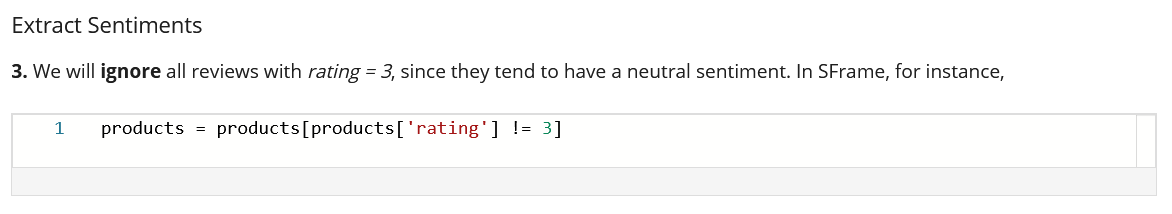

In [10]:
products = products[products['rating']!=3]

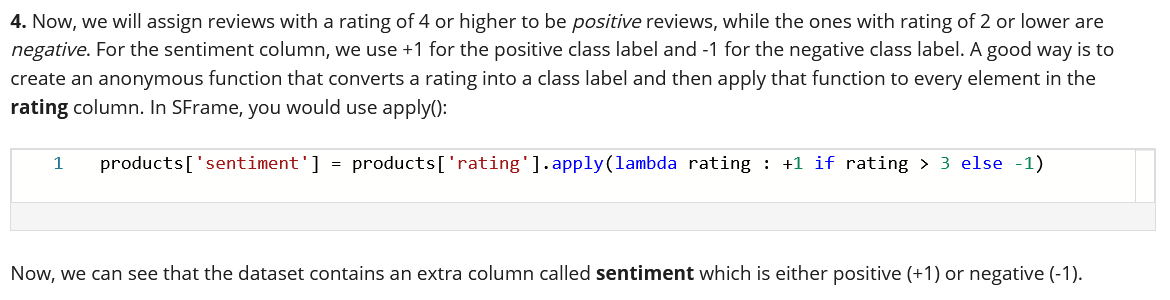

In [11]:
# rating >=4 --> +ve reviews
# rating <=2 --> -ve reviews
products['sentiment'] = products['rating'].apply(lambda rating : +1 if rating>=4 else -1)

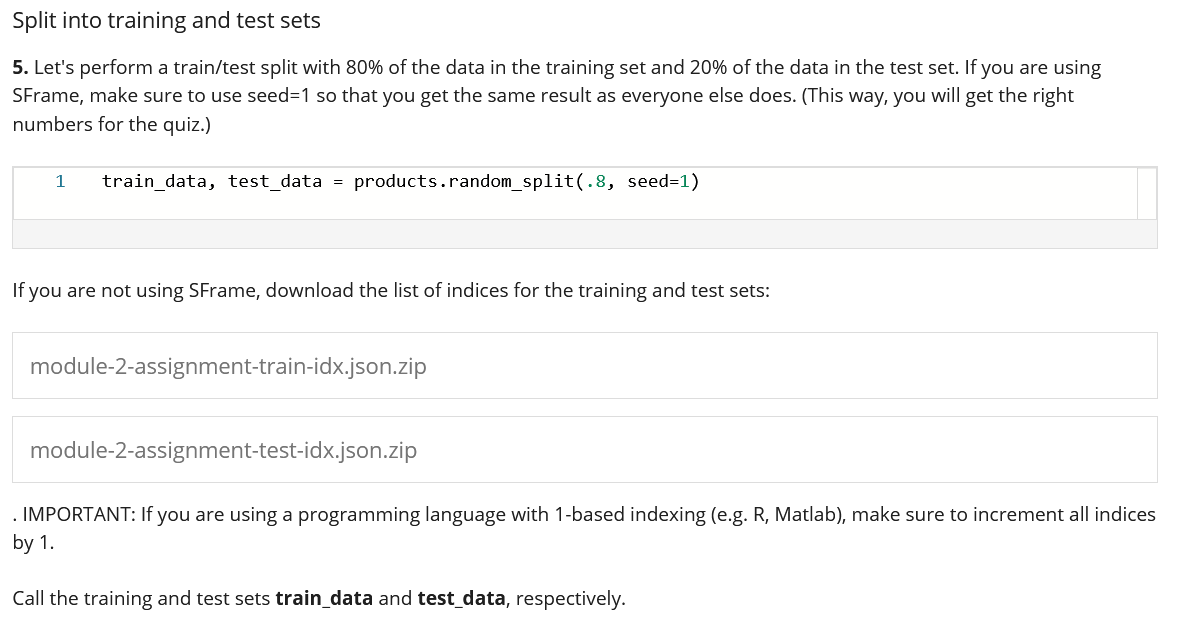

In [12]:
train_index = pd.read_json('../data_sets/module-2-assignment-train-idx.json',typ='series')
test_index  = pd.read_json('../data_sets/module-2-assignment-test-idx.json',typ='series')

train_data = products.iloc[train_index]
test_data   = products.iloc[test_index]

In [13]:
print(pd.DataFrame(train_index).head(5))

   0
0  0
1  1
2  2
3  3
4  4


In [14]:
print(products.iloc[3])
pd.DataFrame(train_data.iloc[3])

name            Stop Pacifier Sucking without tears with Thumb...
review          All of my kids have cried non-stop when I trie...
rating                                                          5
review_clean    All of my kids have cried nonstop when I tried...
sentiment                                                       1
Name: 4, dtype: object


,4
name,Stop Pacifier Sucking without tears with Thumb...
review,All of my kids have cried non-stop when I trie...
rating,5
review_clean,All of my kids have cried nonstop when I tried...
sentiment,1


In [15]:
print(products.iloc[4])
pd.DataFrame(train_data.iloc[4])

name            Stop Pacifier Sucking without tears with Thumb...
review          When the Binky Fairy came to our house, we did...
rating                                                          5
review_clean    When the Binky Fairy came to our house we didn...
sentiment                                                       1
Name: 5, dtype: object


,5
name,Stop Pacifier Sucking without tears with Thumb...
review,"When the Binky Fairy came to our house, we did..."
rating,5
review_clean,When the Binky Fairy came to our house we didn...
sentiment,1


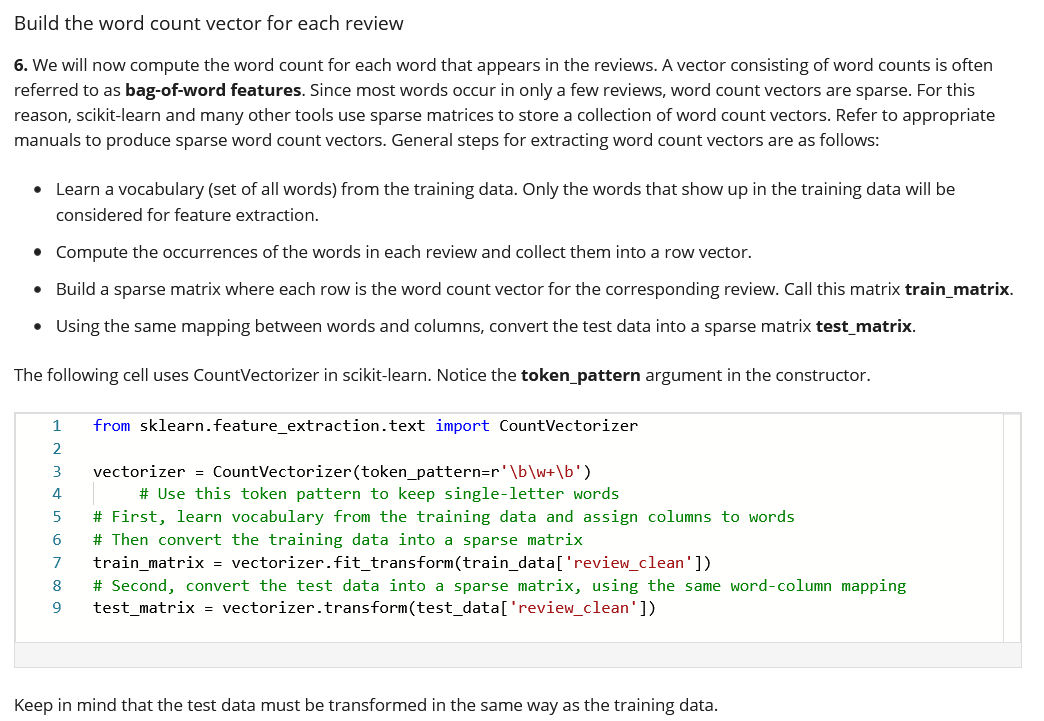

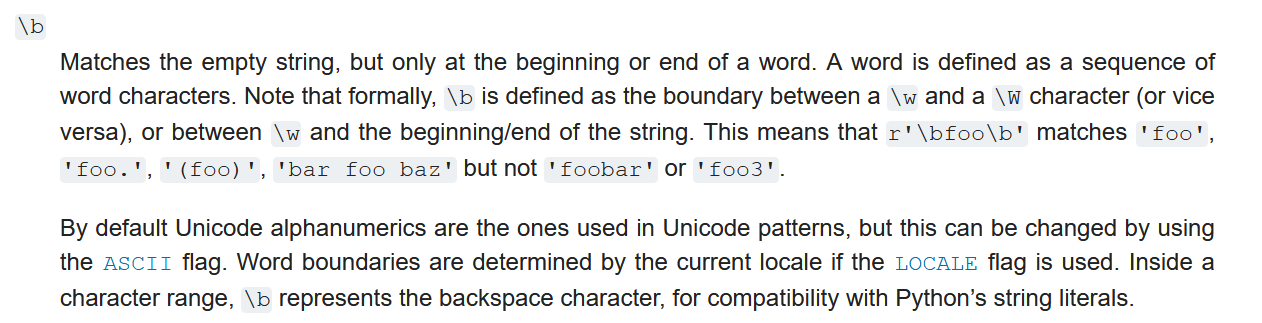

In [16]:
from sklearn.feature_extraction.text import CountVectorizer

## feature extraction technique
vectorizer = CountVectorizer(token_pattern = r'\b\w+\b')
print(vectorizer)

CountVectorizer(token_pattern='\\b\\w+\\b')


In [17]:
train_matrix = vectorizer.fit_transform(train_data['review_clean'])
test_matrix  = vectorizer.transform(test_data['review_clean'])

In [18]:
print(pd.DataFrame(train_matrix))

                                                        0
0         (0, 57485)\t3\n  (0, 21720)\t1\n  (0, 37327)...
1         (0, 57485)\t1\n  (0, 10505)\t2\n  (0, 87457)...
2         (0, 57485)\t1\n  (0, 10505)\t3\n  (0, 72509)...
3         (0, 57485)\t1\n  (0, 10505)\t2\n  (0, 54275)...
4         (0, 57485)\t1\n  (0, 21720)\t1\n  (0, 10505)...
...                                                   ...
133411    (0, 57485)\t8\n  (0, 10505)\t4\n  (0, 72509)...
133412    (0, 10505)\t1\n  (0, 72509)\t1\n  (0, 115479...
133413    (0, 57485)\t2\n  (0, 10505)\t5\n  (0, 54275)...
133414    (0, 10505)\t2\n  (0, 69877)\t1\n  (0, 44645)...
133415    (0, 57485)\t1\n  (0, 10505)\t5\n  (0, 72509)...

[133416 rows x 1 columns]


In [20]:
print(pd.DataFrame(test_matrix))

                                                       0
0        (0, 5842)\t1\n  (0, 7280)\t1\n  (0, 9530)\t1...
1        (0, 7280)\t1\n  (0, 7423)\t1\n  (0, 8072)\t1...
2        (0, 9530)\t1\n  (0, 10505)\t1\n  (0, 13919)\...
3        (0, 7280)\t6\n  (0, 8014)\t1\n  (0, 9530)\t1...
4        (0, 117)\t1\n  (0, 10505)\t2\n  (0, 13919)\t...
...                                                  ...
33331    (0, 10505)\t1\n  (0, 26444)\t1\n  (0, 32506)...
33332    (0, 10070)\t1\n  (0, 10505)\t2\n  (0, 22799)...
33333    (0, 7280)\t2\n  (0, 7423)\t1\n  (0, 8847)\t1...
33334    (0, 7280)\t3\n  (0, 10070)\t2\n  (0, 10505)\...
33335    (0, 9937)\t1\n  (0, 10505)\t1\n  (0, 19073)\...

[33336 rows x 1 columns]


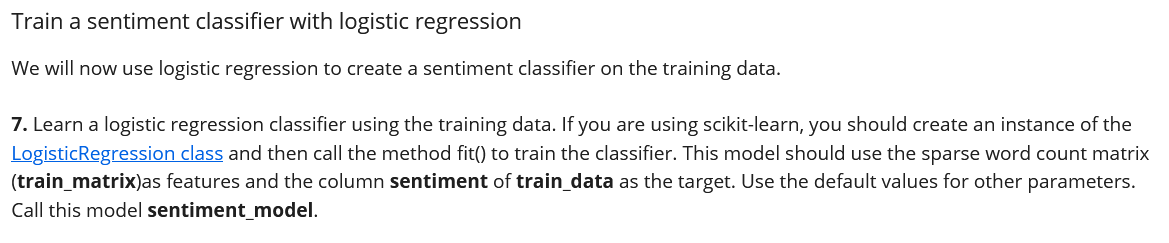

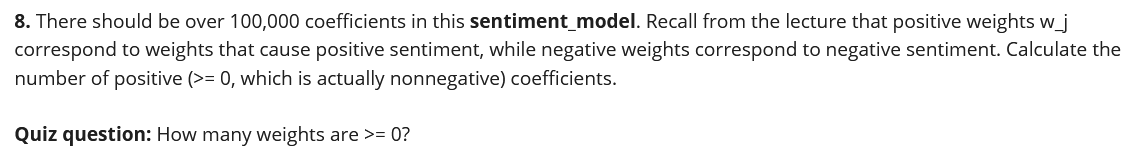

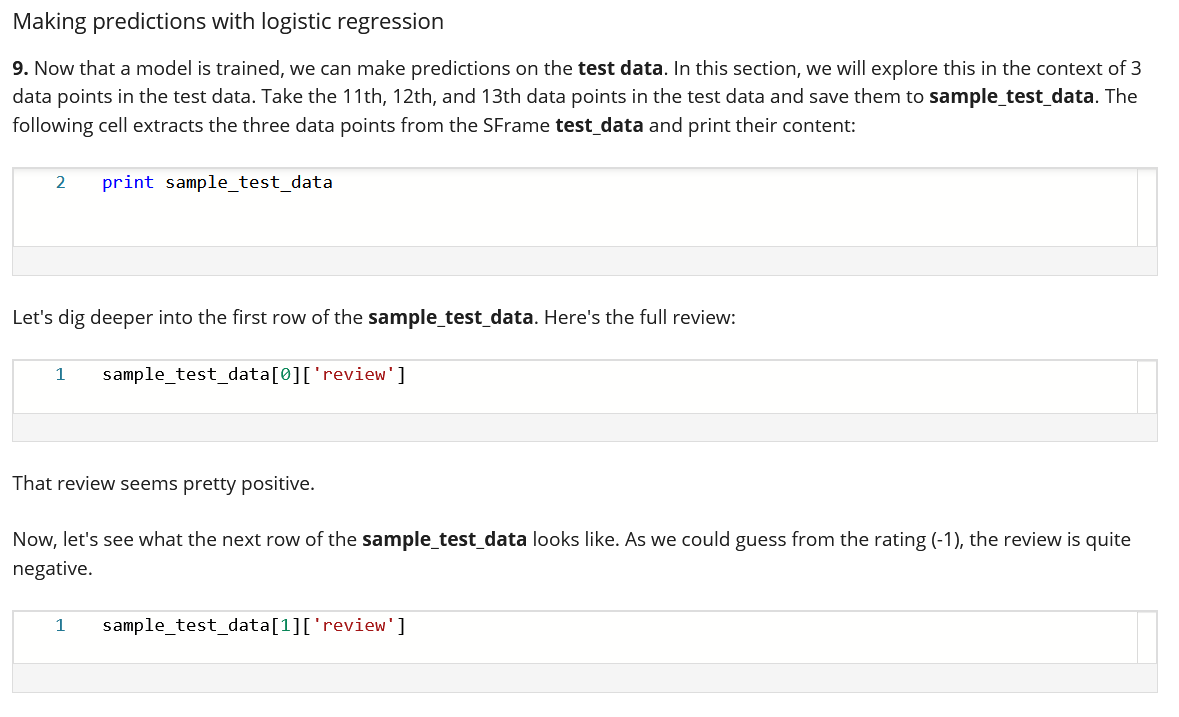

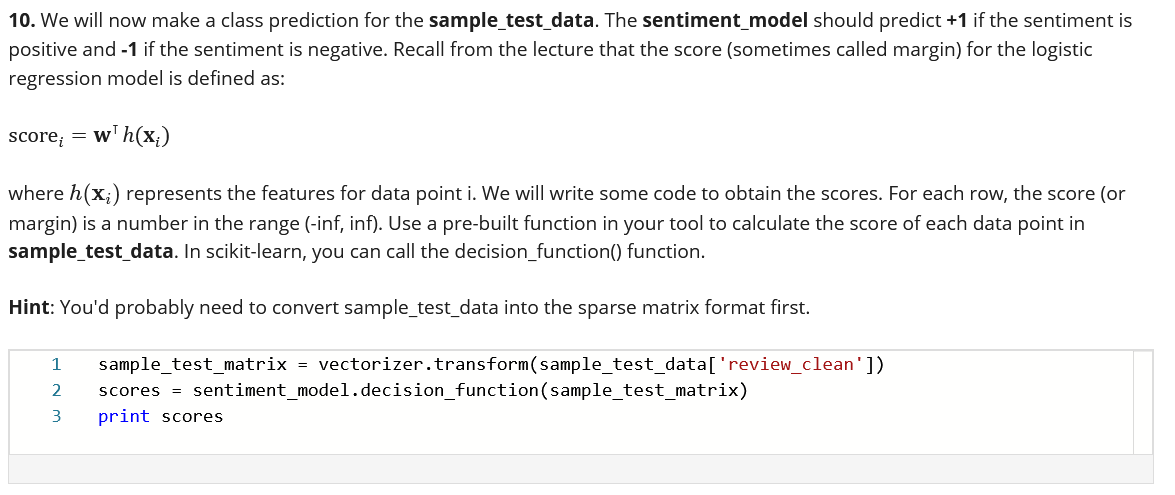

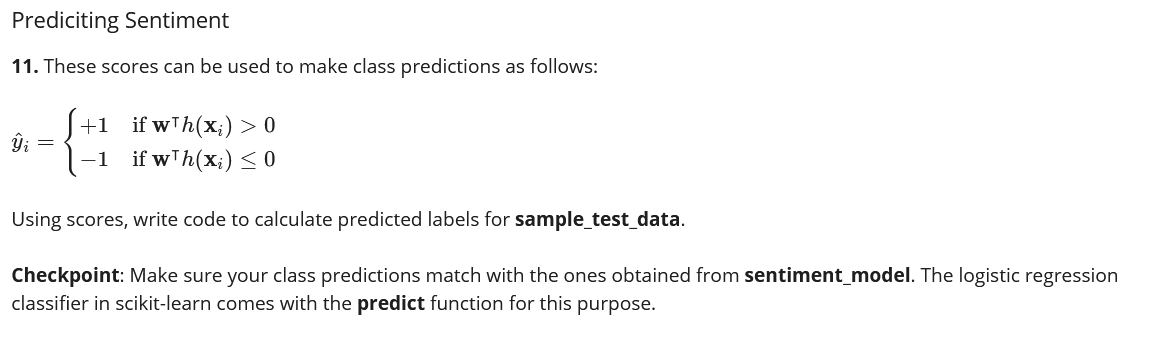

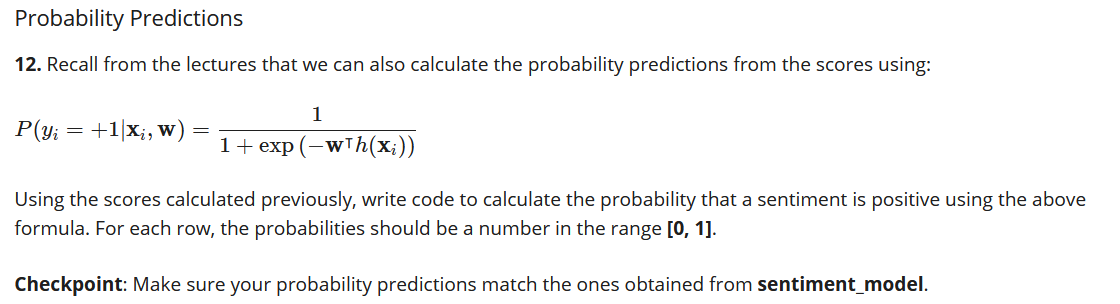

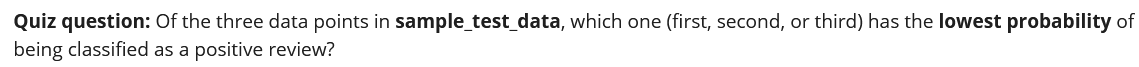

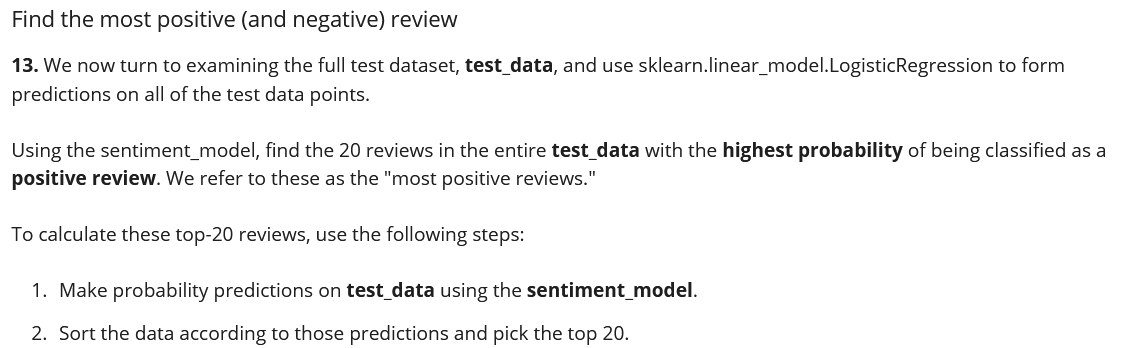

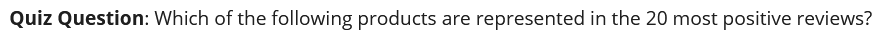

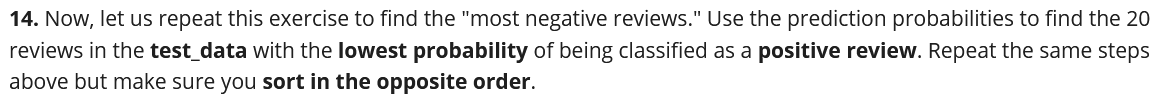

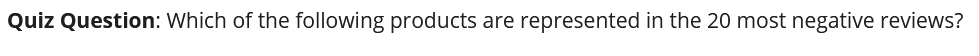

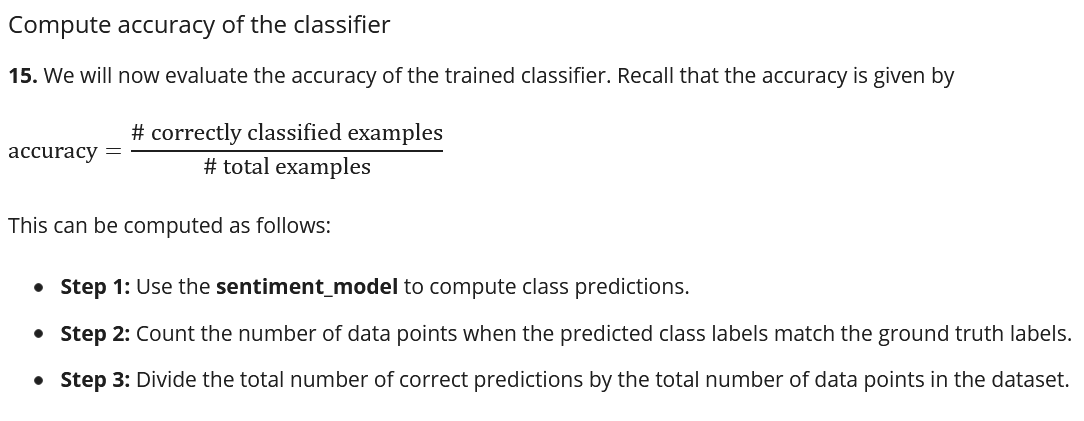

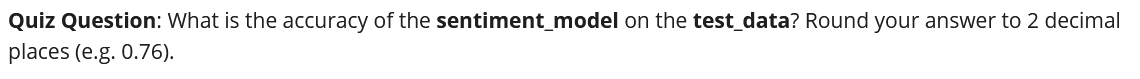

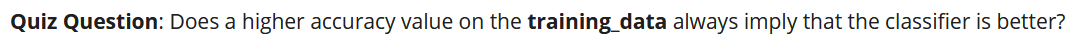

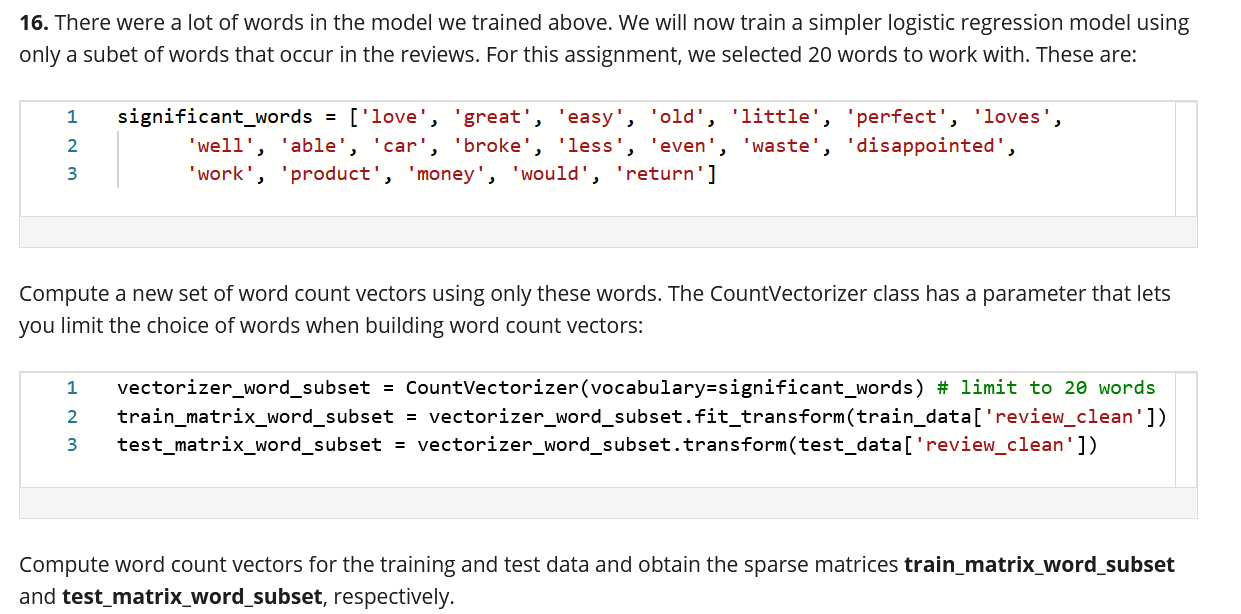

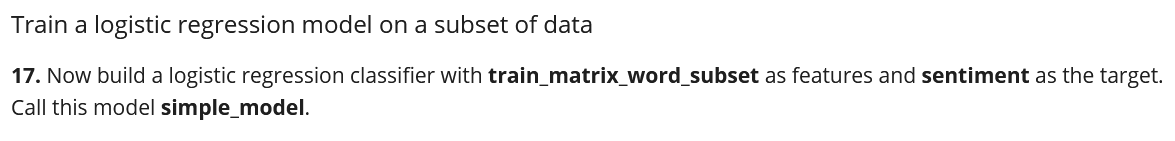

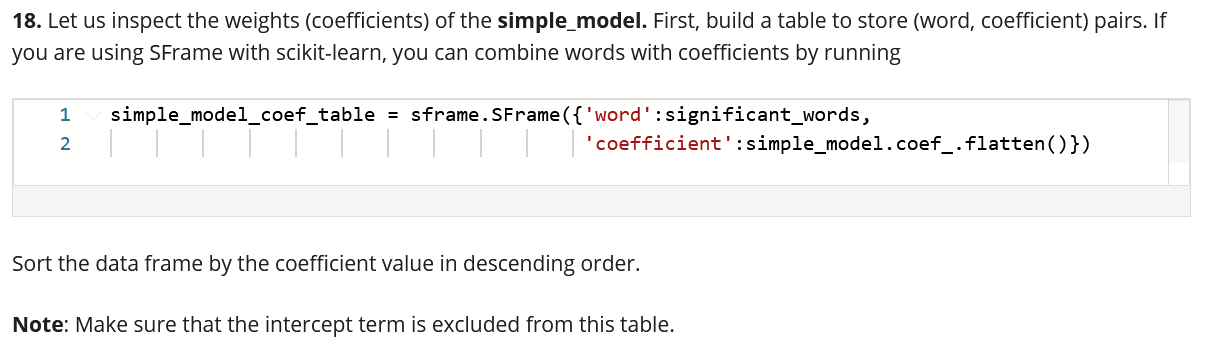

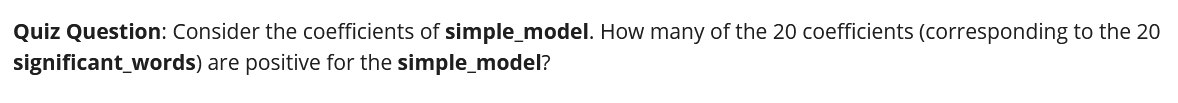

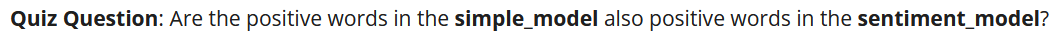

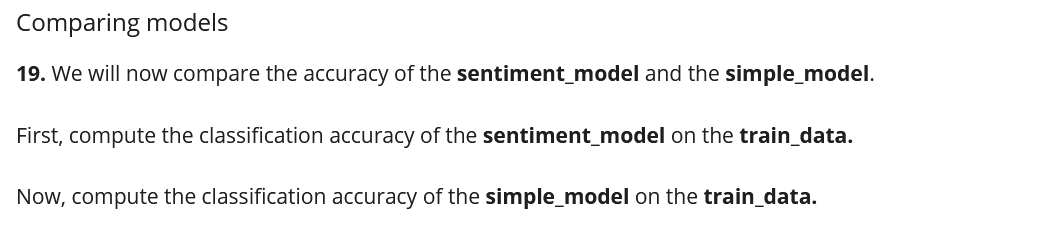

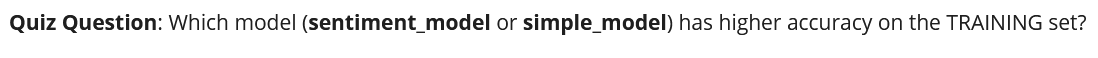

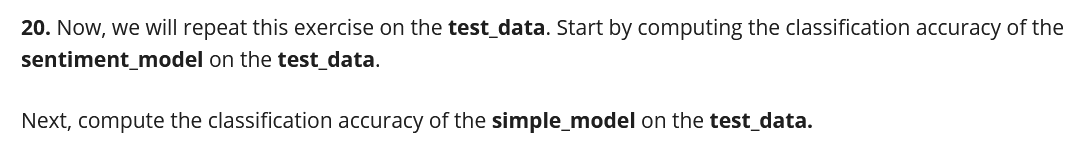

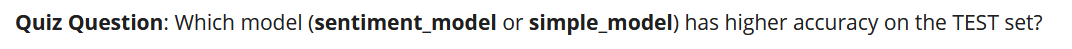

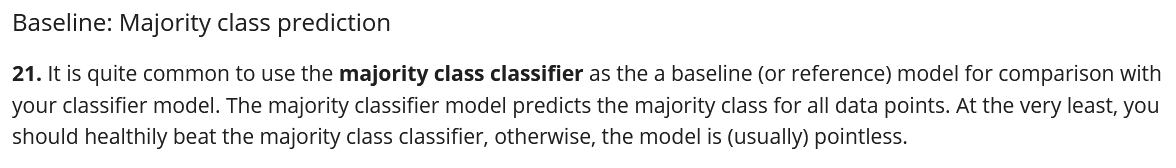

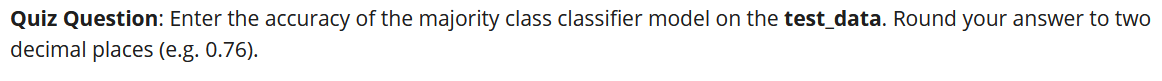

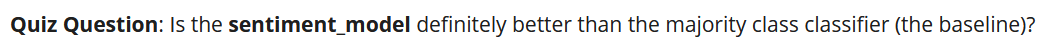

name      318
review      0
rating      0
dtype: int64

### 2) Perform Text cleaning
We start by removing punctuation, so that words "cake." and "cake!" are counted as the same word.

 i) Write a function remove_punctuation that strips punctuation from a line of text.

 ii)Apply this function to every element in the review column of products, and save the result to a new column review_clean.
 
IMPORTANT: Make sure to fill n/a values in the review column with empty strings (if applicable). The n/a values indicate empty reviews. For instance, Pandas's the fillna() method lets you replace all N/A's in the review columns as follows:

In [348]:
def remove_punctuation(text):
    table = str.maketrans('','',string.punctuation) 
    return text.translate(table)

# string.punctuation --> returns all the punctuation marks in the string '!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'
# table -->  {33: None, 34: None, 35: None , .... ,126: None}
# If any special character is seen, translate will see the charactor through the ASCII and checks the table.
# If the value is present in the table, it will replace that character with None

In [349]:
# The overall beauty is that all the special characters are removed, and the remaining text is self alligned

Aside. In this notebook, we remove all punctuation for the sake of simplicity. A smarter approach to punctuation would preserve phrases such as "I'd", "would've", "hadn't" and so forth. See this page for an example of smart handling of punctuation.

IMPORTANT. Make sure to fill n/a values in the review column with empty strings (if applicable). The n/a values indicate empty reviews. For instance, Pandas's the fillna() method lets you replace all N/A's in the review columns as follows:

In [350]:
print("Before Converting")

print('1st review ')
print(df['review'][0])
print()
print('2nd review')
print(df['review'][1])

Before Converting
1st review 
These flannel wipes are OK, but in my opinion not worth keeping.  I also ordered someImse Vimse Cloth Wipes-Ocean Blue-12 countwhich are larger, had a nicer, softer texture and just seemed higher quality.  I use cloth wipes for hands and faces and have been usingThirsties 6 Pack Fab Wipes, Boyfor about 8 months now and need to replace them because they are starting to get rough and have had stink issues for a while that stripping no longer handles.

2nd review
it came early and was not disappointed. i love planet wise bags and now my wipe holder. it keps my osocozy wipes moist and does not leak. highly recommend it.


In [351]:
# In this way all the punctuations are removed and replaced with None
df['review_clean'] = df['review'].apply(remove_punctuation)
print("Before Converting")

print('1st review ')
print(df['review_clean'][0])
print()
print('2nd review')
print(df['review_clean'][1])

Before Converting
1st review 
These flannel wipes are OK but in my opinion not worth keeping  I also ordered someImse Vimse Cloth WipesOcean Blue12 countwhich are larger had a nicer softer texture and just seemed higher quality  I use cloth wipes for hands and faces and have been usingThirsties 6 Pack Fab Wipes Boyfor about 8 months now and need to replace them because they are starting to get rough and have had stink issues for a while that stripping no longer handles

2nd review
it came early and was not disappointed i love planet wise bags and now my wipe holder it keps my osocozy wipes moist and does not leak highly recommend it


### 3) Extract Sentiments

We will ignore all reviews with rating = 3, since they tend to have a neutral sentiment. In SFrame, for instance,

In [352]:
before = len(df)
df = df[df['rating']!=3]
after = len(df)

print("Before removing : ",before)
print("After removing  : ",after)
print("{} rows are with rating=3 (neutral sentiment), So they are removed".format(before-after))

Before removing :  183531
After removing  :  166752
16779 rows are with rating=3 (neutral sentiment), So they are removed


### 4) Splitting into +ve and -ve reviews

Now, we will assign reviews with a rating of 4 or higher to be positive reviews, 

while the ones with rating of 2 or lower are negative. 

For the sentiment column, we use +1 for the positive class label and -1 for the negative class label. A good way is to create an anonymous function that converts a rating into a class label and then apply that function to every element in the rating column. In SFrame, you would use apply():

In [353]:
df.head()

,name,review,rating,review_clean
1,Planetwise Wipe Pouch,it came early and was not disappointed. i love...,5,it came early and was not disappointed i love ...
2,Annas Dream Full Quilt with 2 Shams,Very soft and comfortable and warmer than it l...,5,Very soft and comfortable and warmer than it l...
3,Stop Pacifier Sucking without tears with Thumb...,This is a product well worth the purchase. I ...,5,This is a product well worth the purchase I h...
4,Stop Pacifier Sucking without tears with Thumb...,All of my kids have cried non-stop when I trie...,5,All of my kids have cried nonstop when I tried...
5,Stop Pacifier Sucking without tears with Thumb...,"When the Binky Fairy came to our house, we did...",5,When the Binky Fairy came to our house we didn...


In [354]:
# review>=4  --> sentiments=1
# review<=2  --> sentiments=-1

df['sentiments'] = df['rating'].apply(lambda x : +1 if x>=4 else -1)
df.head()

,name,review,rating,review_clean,sentiments
1,Planetwise Wipe Pouch,it came early and was not disappointed. i love...,5,it came early and was not disappointed i love ...,1
2,Annas Dream Full Quilt with 2 Shams,Very soft and comfortable and warmer than it l...,5,Very soft and comfortable and warmer than it l...,1
3,Stop Pacifier Sucking without tears with Thumb...,This is a product well worth the purchase. I ...,5,This is a product well worth the purchase I h...,1
4,Stop Pacifier Sucking without tears with Thumb...,All of my kids have cried non-stop when I trie...,5,All of my kids have cried nonstop when I tried...,1
5,Stop Pacifier Sucking without tears with Thumb...,"When the Binky Fairy came to our house, we did...",5,When the Binky Fairy came to our house we didn...,1


Now, we can see that the dataset contains an extra column called sentiment which is either positive (+1) or negative (-1).

### 5) Split into training and test sets

Let's perform a train/test split with 80% of the data in the training set and 20% of the data in the test set. If you are using SFrame, make sure to use seed=1 so that you get the same result as everyone else does. (This way, you will get the right numbers for the quiz.)

In [355]:
with open('module-2-assignment-test-idx.json') as temp_test:    
    test_index = json.load(temp_test)
with open('module-2-assignment-train-idx.json') as temp_train:    
    train_index = json.load(temp_train)

df_train = df.iloc[train_index]
df_test  = df.iloc[test_index]

In [356]:
df_train.head()

,name,review,rating,review_clean,sentiments
1,Planetwise Wipe Pouch,it came early and was not disappointed. i love...,5,it came early and was not disappointed i love ...,1
2,Annas Dream Full Quilt with 2 Shams,Very soft and comfortable and warmer than it l...,5,Very soft and comfortable and warmer than it l...,1
3,Stop Pacifier Sucking without tears with Thumb...,This is a product well worth the purchase. I ...,5,This is a product well worth the purchase I h...,1
4,Stop Pacifier Sucking without tears with Thumb...,All of my kids have cried non-stop when I trie...,5,All of my kids have cried nonstop when I tried...,1
5,Stop Pacifier Sucking without tears with Thumb...,"When the Binky Fairy came to our house, we did...",5,When the Binky Fairy came to our house we didn...,1


In [357]:
df_test.head()

,name,review,rating,review_clean,sentiments
9,"Baby Tracker&reg; - Daily Childcare Journal, S...",This has been an easy way for my nanny to reco...,4,This has been an easy way for my nanny to reco...,1
10,"Baby Tracker&reg; - Daily Childcare Journal, S...",I love this journal and our nanny uses it ever...,4,I love this journal and our nanny uses it ever...,1
16,Nature's Lullabies First Year Sticker Calendar,"I love this little calender, you can keep trac...",5,I love this little calender you can keep track...,1
20,Nature's Lullabies Second Year Sticker Calendar,I had a hard time finding a second year calend...,5,I had a hard time finding a second year calend...,1
28,"Lamaze Peekaboo, I Love You","One of baby's first and favorite books, and it...",4,One of babys first and favorite books and it i...,1


In [358]:
df_train.review_clean[0:10]

1     it came early and was not disappointed i love ...
2     Very soft and comfortable and warmer than it l...
3     This is a product well worth the purchase  I h...
4     All of my kids have cried nonstop when I tried...
5     When the Binky Fairy came to our house we didn...
6     Lovely book its bound tightly so you may not b...
7     Perfect for new parents We were able to keep t...
8     A friend of mine pinned this product on Pinter...
11    This book is perfect  Im a first time new mom ...
12    I originally just gave the nanny a pad of pape...
Name: review_clean, dtype: object

In [359]:
print(len(df_train))
print(len(df_test))

133416
33336


### 6) Build the word count vector for each review

We will now compute the word count for each word that appears in the reviews. A vector consisting of word counts is often referred to as bag-of-word features. Since most words occur in only a few reviews, word count vectors are sparse. For this reason, scikit-learn and many other tools use sparse matrices to store a collection of word count vectors. Refer to appropriate manuals to produce sparse word count vectors. General steps for extracting word count vectors are as follows:

* Learn a vocabulary (set of all words) from the training data. Only the words that show up in the training data will be considered for feature extraction.
* Compute the occurrences of the words in each review and collect them into a row vector.
* Build a sparse matrix where each row is the word count vector for the corresponding review. Call this matrix train_matrix.
* Using the same mapping between words and columns, convert the test data into a sparse matrix test_matrix.

The following cell uses CountVectorizer in scikit-learn. Notice the token_pattern argument in the constructor.

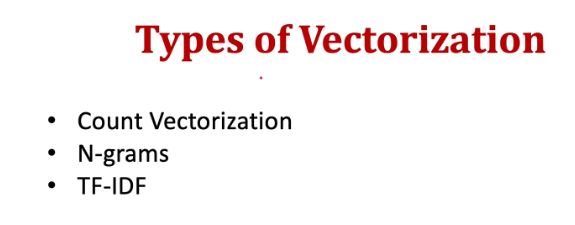

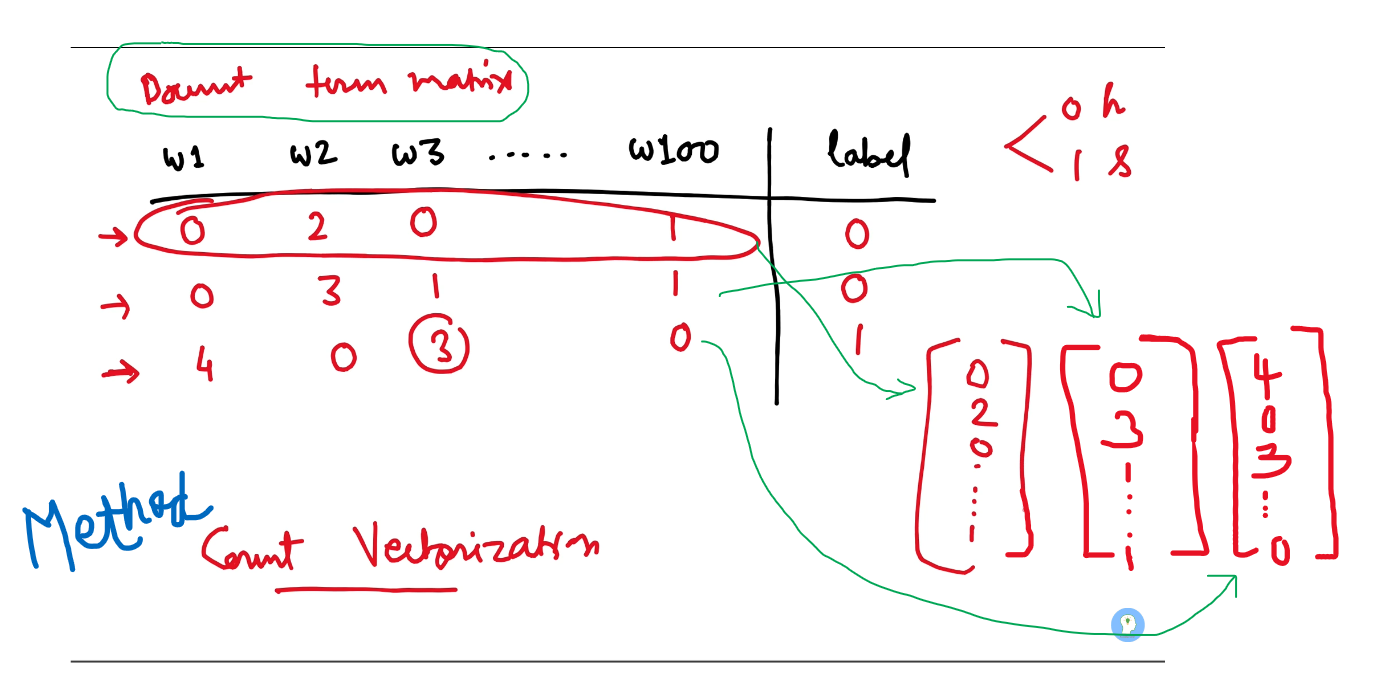

In [360]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(token_pattern=r'\b\w+\b')
train_matrix = cv.fit_transform(df_train['review_clean'])  # Here the training data is fitted into the model and then transformed
test_matrix  = cv.transform(df_test['review_clean'])       # Here the testing data is only tranformed and not fitted

In [361]:
print(len(cv.vocabulary_.keys()))

121711


In [362]:
import dask.dataframe as dd
train_bag_of_words = dd.DataFrame(train_matrix.toarray(),columns=cv.vocabulary_.keys())
train_bag_of_words

MemoryError: Unable to allocate 121. GiB for an array with shape (133416, 121711) and data type int64

In [364]:
train_bag_of_words = pd.DataFrame(train_matrix.toarray(),columns=cv.vocabulary_.keys())
train_bag_of_words

MemoryError: Unable to allocate 121. GiB for an array with shape (133416, 121711) and data type int64

In [365]:
#print(cv.vocabulary_)  dictionary of words and their corresponding indices (arranged in alphabetical order)
cv.transform(['and']).toarray()

array([[0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [366]:
cv.transform(['hot']).toarray()

array([[0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [367]:
train_matrix

<133416x121711 sparse matrix of type '<class 'numpy.int64'>'
	with 7326565 stored elements in Compressed Sparse Row format>

In [368]:
test_matrix

<33336x121711 sparse matrix of type '<class 'numpy.int64'>'
	with 1816848 stored elements in Compressed Sparse Row format>

In [369]:
print('Shape of the Train matrix : ',*train_matrix.shape)
print('Shape of the Test matrix  : ',*test_matrix.shape)

Shape of the Train matrix :  133416 121711
Shape of the Test matrix  :  33336 121711


In [370]:
# train_data is fitted into the model and transformed into the document_matrix
# test_data  is not fitted into the model but transformed into the document_matrix 

Keep in mind that the test data must be transformed in the same way as the training data.

### 7) Train a sentiment classifier with logistic regression

We will now use logistic regression to create a sentiment classifier on the training data.

Learn a logistic regression classifier using the training data. If you are using scikit-learn, you should create an instance of the LogisticRegression class and then call the method fit() to train the classifier. This model should use the sparse word count matrix (train_matrix)as features and the column sentiment of train_data as the target. Use the default values for other parameters. Call this model sentiment_model.

In [371]:
from sklearn.linear_model import LogisticRegression

logistic_instance = LogisticRegression(solver='liblinear',n_jobs=1)   # instances of the LogisticRegression class
## features --> sparse word count(document matrix)  and   output --> train['sentiments']
sentiment_model   = logistic_instance.fit(train_matrix,df_train['sentiments']) 

C:\Users\Prashanth\AppData\Roaming\Python\Python37\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [372]:
print('Classes used in the above classifier : ',sentiment_model.classes_)

Classes used in the above classifier :  [-1  1]


In [373]:
print('The coefficients are : ',*sentiment_model.coef_)
print('The intercept is     : ',*sentiment_model.intercept_)

The coefficients are :  [-1.24035385e+00  2.71597301e-05  2.75446602e-02 ...  1.26147022e-02
  2.70446255e-03 -4.12439876e-05]
The intercept is     :  1.3797840489891677


### 8)

There should be over 100,000 coefficients in this sentiment_model. Recall from the lecture that positive weights w_j correspond to weights that cause positive sentiment, while negative weights correspond to negative sentiment. Calculate the number of positive (>= 0, which is actually nonnegative) coefficients.

In [374]:
print('The Dimension of the coefficient : ',sentiment_model.coef_.shape)

The Dimension of the coefficient :  (1, 121711)


Recall from the lecture that positive weights $w_j$ correspond to weights that cause positive sentiment, while negative weights correspond to negative sentiment.

If the weighs>0, then Positive reviews and if weighs<0, then Negative reviews

In [376]:
print('Postitive reviews : ',np.sum(sentiment_model.coef_>=0))
print('Negative  reviews : ',np.sum(sentiment_model.coef_<0))

Postitive reviews :  87110
Negative  reviews :  34601


## Quiz question
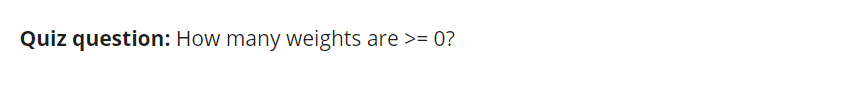

In [378]:
print('The total number of Weighs>=0 : ',np.sum(sentiment_model.coef_>=0))

The total number of Weighs>=0 :  87110


### 9) Making predictions with logistic regression

Now that a model is trained, we can make predictions on the test data. In this section, we will explore this in the context of 3 data points in the test data. Take the 11th, 12th, and 13th data points in the test data and save them to sample_test_data

In [379]:
sample_test_data = df_test[10:13]
sample_test_data

,name,review,rating,review_clean,sentiments
59,Our Baby Girl Memory Book,Absolutely love it and all of the Scripture in...,5,Absolutely love it and all of the Scripture in...,1
71,Wall Decor Removable Decal Sticker - Colorful ...,Would not purchase again or recommend. The dec...,2,Would not purchase again or recommend The deca...,-1
91,New Style Trailing Cherry Blossom Tree Decal R...,Was so excited to get this product for my baby...,1,Was so excited to get this product for my baby...,-1


Let's dig deeper into the first row of the sample_test_data. Here's the full review:

In [380]:
sample_test_data['review_clean'][59]  # Positive review

'Absolutely love it and all of the Scripture in it  I purchased the Baby Boy version for my grandson when he was born and my daughterinlaw was thrilled to receive the same book again'

That review seems pretty positive.

Now, let's see what the next row of the sample_test_data looks like. As we could guess from the sentiment (-1), the review is quite negative.

In [381]:
sample_test_data['review_clean'][71]  # Negative review

'Would not purchase again or recommend The decals were thick almost plastic like and were coming off the wall as I was applying them The would NOT stick Literally stayed stuck for about 5 minutes then started peeling off'

In [382]:
sample_test_data['review_clean'][91]  # Negative review

'Was so excited to get this product for my baby girls bedroom  When I got it the back is NOT STICKY at all  Every time I walked into the bedroom I was picking up pieces off of the floor  Very very frustrating  Ended up having to super glue it to the wallvery disappointing  I wouldnt waste the time or money on it'

### 10)
We will now make a class prediction for the sample_test_data. The sentiment_model should predict +1 if the sentiment is positive and -1 if the sentiment is negative. Recall from the lecture that the score (sometimes called margin) for the logistic regression model is defined as:

$$
\mbox{score}_i = \mathbf{w}^T h(\mathbf{x}_i)
$$
where $h(\mathbf{x}_i)$ represents the features for example $i$. We will write some code to obtain the scores using GraphLab Create.For each row, the score (or margin) is a number in the range (-inf, inf). Use a pre-built function in your tool to calculate the score of each data point in sample_test_data. In scikit-learn, you can call the decision_function() function.

### Hint : 
You'd probably need to convert sample_test_data into the sparse matrix format first.

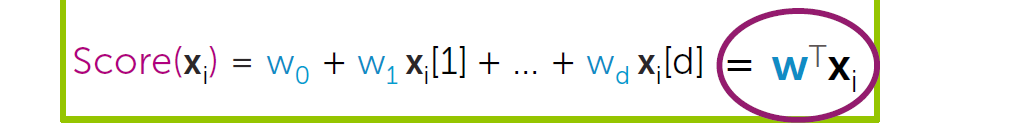

In [383]:
# 1) Transforming the sample_test_data = [59,71 and 91 review] into document_matrix, so that it can be fitted into the model
# 2) Using the classifier model (i.e model.decision_function() ) to predict the score of the sample_test_data

In [384]:
## Document matrix of 59th,71st and 91st review
sample_test_matrix = cv.transform(sample_test_data['review_clean'])  
sample_df = pd.DataFrame(sample_test_matrix.toarray(),columns = cv.get_feature_names())
print(sample_df)

   0  00  000  0001  001  001cm  002  01  010  010204  ...  zwiebeck  zx2  \
0  0   0    0     0    0      0    0   0    0       0  ...         0    0   
1  0   0    0     0    0      0    0   0    0       0  ...         0    0   
2  0   0    0     0    0      0    0   0    0       0  ...         0    0   

   zydeco  zzzipme  zzzs  zzzzs  zzzzzs  zzzzzz  zzzzzzz  zzzzzzzzzzz  
0       0        0     0      0       0       0        0            0  
1       0        0     0      0       0       0        0            0  
2       0        0     0      0       0       0        0            0  

[3 rows x 121711 columns]


In [385]:
## decision_function() --> Predict confidence scores for samples.
#The confidence score for a sample is the signed distance of that sample to the hyperplane.

scores  = sentiment_model.decision_function(sample_test_matrix) 
print('The confidence scores of 59th, 71st and 91st review : ',*scores)

## In the sentiment_model one line will be drawn with the 
# train data (x=train_matrix(spare matrix) , y=df_train['sentiments']) 
# and required coefficients are obtained.

# Now we are fitting the sample_test_matrix into the sentiment model and predicting the confidence score of the sample

The confidence scores of 59th, 71st and 91st review :  5.602101731734404 -3.1689587930511265 -10.424585723682581


### 11) Predicting Sentiment

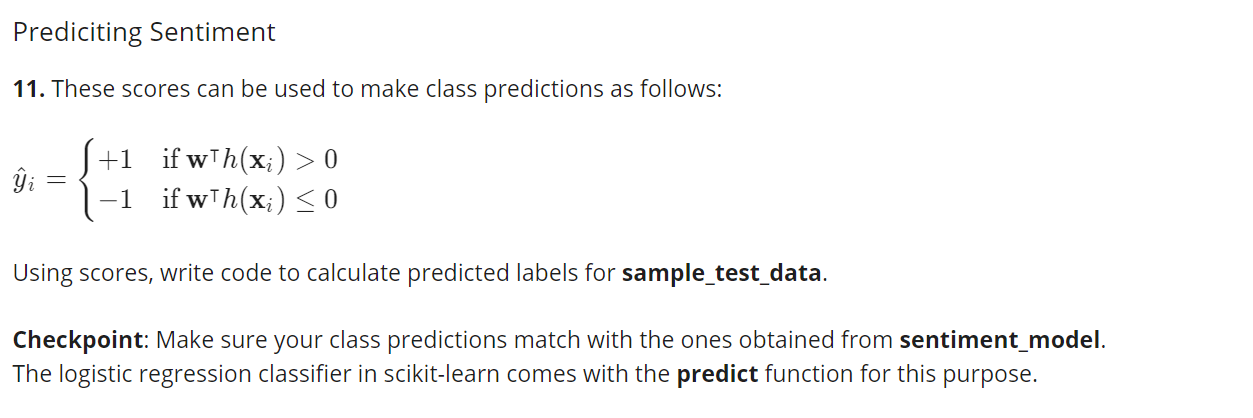

In [386]:
## Normal method
yhat = []
for i in scores:
    if i>0: yhat.append(1)
    else: yhat.append(-1)
print('Predicted labels for the sample_test_data using normal calculations : ',yhat)

## Using list comprehension
yhat = []
yhat = [1 if i>0 else -1 for i in scores]
print('Predicted labels for the sample_test_data using normal calculations : ',yhat)

Predicted labels for the sample_test_data using normal calculations :  [1, -1, -1]
Predicted labels for the sample_test_data using normal calculations :  [1, -1, -1]


In [387]:
## Check point --> Matching the above obtained output with predict function of sckit-learn
## Predicting via the model
print('Predicted labels for sample_test_data using sckit-learn: ',
                    sentiment_model.predict(sample_test_matrix))

Predicted labels for sample_test_data using sckit-learn:  [ 1 -1 -1]


### 12) Probability Prediction

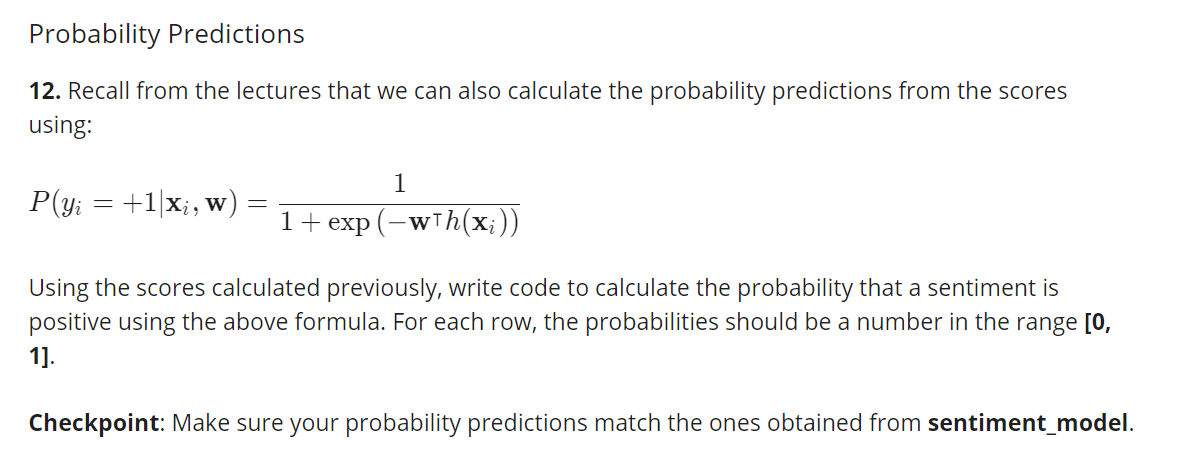

In [388]:
cal_probability = [1/(1+np.exp(-i)) for i in scores]
print("Predicted probability for the sample_test_data using normal calculations",cal_probability)

Predicted probability for the sample_test_data using normal calculations [0.996323466814478, 0.04035071430407024, 2.9692519378971573e-05]


In [389]:
## Check point --> Matching the above obtained output with predict function of sckit-learn
sc_probability = sentiment_model.predict_proba(sample_test_matrix)
print("Predicted labels for sample_test_data using sckit-learn: ")
print(*sc_probability)

Predicted labels for sample_test_data using sckit-learn: 
[0.00367653 0.99632347] [0.95964929 0.04035071] [9.99970307e-01 2.96925194e-05]


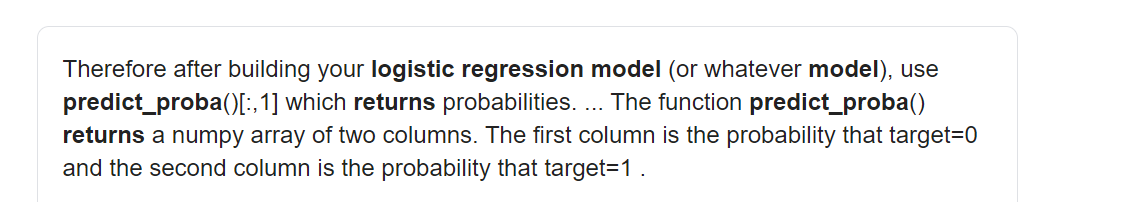

## Quiz question
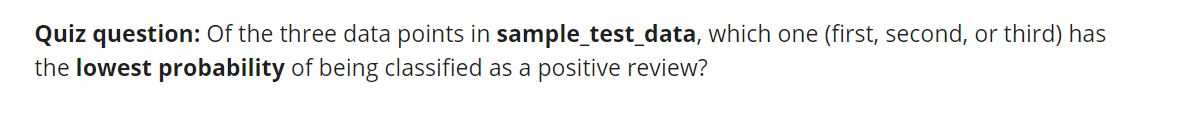

In [391]:
print('P(y=+1 | xi,w): ',sentiment_model.predict_proba(sample_test_matrix)[:,1])
print('P(y=-1 | xi,w): ',sentiment_model.predict_proba(sample_test_matrix)[:,0])

P(y=+1 | xi,w):  [9.96323467e-01 4.03507143e-02 2.96925194e-05]
P(y=-1 | xi,w):  [0.00367653 0.95964929 0.99997031]


In [392]:
## Adding the probability will give rise to 1
print(sentiment_model.predict_proba(sample_test_matrix))

[[3.67653319e-03 9.96323467e-01]
 [9.59649286e-01 4.03507143e-02]
 [9.99970307e-01 2.96925194e-05]]


In [393]:
## Quiz question:
index_min = np.argmin(sc_probability[:,1])  # Returns the indices of the minimum values along an axis.
print('Lowest probability of being classified as a positive review : ',
             min(sentiment_model.predict_proba(sample_test_matrix)[:,1]))
print('Out of three data points, the lowest probability of being classified as positive_review : ',
      index_min+1)

Lowest probability of being classified as a positive review :  2.9692519378971573e-05
Out of three data points, the lowest probability of being classified as positive_review :  3


### 13) Find the most positive (and negative) review
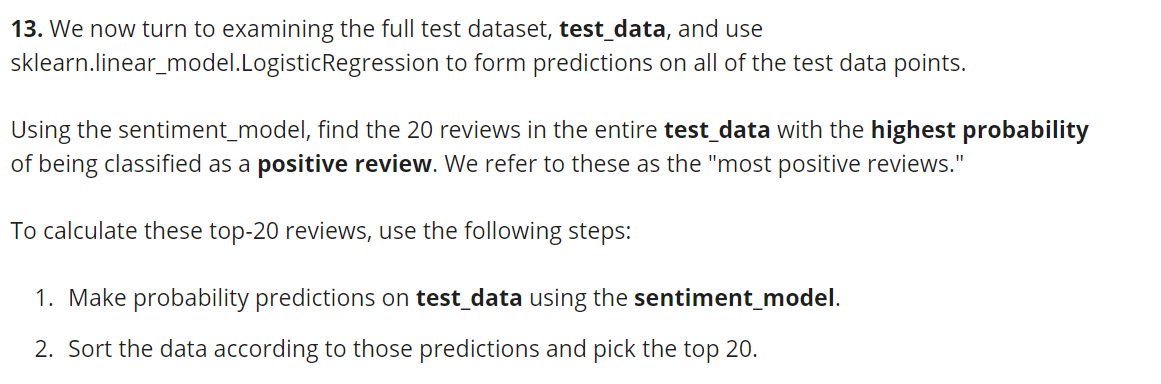

In [394]:
with open('module-2-assignment-test-idx.json') as temp_test:    
    test_index = json.load(temp_test)
with open('module-2-assignment-train-idx.json') as temp_train:    
    train_index = json.load(temp_train)

df_train = df.iloc[train_index]
df_test  = df.iloc[test_index]

In [395]:
df_test.head()

,name,review,rating,review_clean,sentiments
9,"Baby Tracker&reg; - Daily Childcare Journal, S...",This has been an easy way for my nanny to reco...,4,This has been an easy way for my nanny to reco...,1
10,"Baby Tracker&reg; - Daily Childcare Journal, S...",I love this journal and our nanny uses it ever...,4,I love this journal and our nanny uses it ever...,1
16,Nature's Lullabies First Year Sticker Calendar,"I love this little calender, you can keep trac...",5,I love this little calender you can keep track...,1
20,Nature's Lullabies Second Year Sticker Calendar,I had a hard time finding a second year calend...,5,I had a hard time finding a second year calend...,1
28,"Lamaze Peekaboo, I Love You","One of baby's first and favorite books, and it...",4,One of babys first and favorite books and it i...,1


### Method-1

In [396]:
# In-order to predict the probability on test_data, it must must be converted into sparse matrix(i.e test_matrix)
df_test1 = df_test.copy()
df_test1['probability'] = sentiment_model.predict_proba(test_matrix)[:,1] # Taking only the +ve reviews 
df_test1.head()

,name,review,rating,review_clean,sentiments,probability
9,"Baby Tracker&reg; - Daily Childcare Journal, S...",This has been an easy way for my nanny to reco...,4,This has been an easy way for my nanny to reco...,1,0.784742
10,"Baby Tracker&reg; - Daily Childcare Journal, S...",I love this journal and our nanny uses it ever...,4,I love this journal and our nanny uses it ever...,1,0.999999
16,Nature's Lullabies First Year Sticker Calendar,"I love this little calender, you can keep trac...",5,I love this little calender you can keep track...,1,0.933230
20,Nature's Lullabies Second Year Sticker Calendar,I had a hard time finding a second year calend...,5,I had a hard time finding a second year calend...,1,0.999979
28,"Lamaze Peekaboo, I Love You","One of baby's first and favorite books, and it...",4,One of babys first and favorite books and it i...,1,0.980217


In [397]:
## Quiz Question: Which of the following products are represented in the 20 most positive reviews?
print(df_test1[df_test1['probability']==1.0]['name'])

22586        Britax Decathlon Convertible Car Seat, Tiffany
50315            P'Kolino Silly Soft Seating in Tias, Green
52631     Evenflo X Sport Plus Convenience Stroller - Ch...
66059          Evenflo 6 Pack Classic Glass Bottle, 4-Ounce
80155     Simple Wishes Hands-Free Breastpump Bra, Pink,...
87017       Baby Einstein Around The World Discovery Center
97325     Freemie Hands-Free Concealable Breast Pump Col...
100166    Infantino Wrap and Tie Baby Carrier, Black Blu...
114796    Fisher-Price Cradle 'N Swing,  My Little Snuga...
119182    Roan Rocco Classic Pram Stroller 2-in-1 with B...
133651                    Britax 2012 B-Agile Stroller, Red
137034           Graco Pack 'n Play Element Playard - Flint
140816           Diono RadianRXT Convertible Car Seat, Plum
147949    Baby Jogger City Mini GT Single Stroller, Shad...
168081    Buttons Cloth Diaper Cover - One Size - 8 Colo...
168697    Graco FastAction Fold Jogger Click Connect Str...
180646        Mamas &amp; Papas 2014 Urb

In [398]:
df_test1.sort_values('probability',ascending=False)['name']

97325     Freemie Hands-Free Concealable Breast Pump Col...
50315            P'Kolino Silly Soft Seating in Tias, Green
147949    Baby Jogger City Mini GT Single Stroller, Shad...
22586        Britax Decathlon Convertible Car Seat, Tiffany
52631     Evenflo X Sport Plus Convenience Stroller - Ch...
                                ...                        
155287    VTech Communications Safe &amp; Sounds Full Co...
48694     Adiri BPA Free Natural Nurser Ultimate Bottle ...
77072        Safety 1st Exchangeable Tip 3 in 1 Thermometer
120209    Levana Safe N'See Digital Video Baby Monitor w...
16042           Fisher-Price Ocean Wonders Aquarium Bouncer
Name: name, Length: 33336, dtype: object

### Method-2

In [399]:
# Probability based on +ve reviews
positive_proba = sentiment_model.predict_proba(test_matrix)[:,1]

In [400]:
## Quiz Question: Which of the following products are represented in the 20 most positive reviews?
df_test2    = df_test.copy()

index_large = positive_proba.argsort()[-20:][::-1]
top_20      = df_test2['name'].iloc[index_large]
print(top_20)

22586        Britax Decathlon Convertible Car Seat, Tiffany
114796    Fisher-Price Cradle 'N Swing,  My Little Snuga...
140816           Diono RadianRXT Convertible Car Seat, Plum
119182    Roan Rocco Classic Pram Stroller 2-in-1 with B...
66059          Evenflo 6 Pack Classic Glass Bottle, 4-Ounce
168081    Buttons Cloth Diaper Cover - One Size - 8 Colo...
137034           Graco Pack 'n Play Element Playard - Flint
180646        Mamas &amp; Papas 2014 Urbo2 Stroller - Black
147949    Baby Jogger City Mini GT Single Stroller, Shad...
133651                    Britax 2012 B-Agile Stroller, Red
50315            P'Kolino Silly Soft Seating in Tias, Green
168697    Graco FastAction Fold Jogger Click Connect Str...
80155     Simple Wishes Hands-Free Breastpump Bra, Pink,...
52631     Evenflo X Sport Plus Convenience Stroller - Ch...
97325     Freemie Hands-Free Concealable Breast Pump Col...
87017       Baby Einstein Around The World Discovery Center
100166    Infantino Wrap and Tie Baby Ca

In [401]:
## Quiz Question: Which of the following products are represented in the 20 most negative reviews?
index_small = np.argsort(positive_proba)[:20]
small_20    = df_test2['name'].iloc[index_small]
print(small_20)

16042           Fisher-Price Ocean Wonders Aquarium Bouncer
120209    Levana Safe N'See Digital Video Baby Monitor w...
77072        Safety 1st Exchangeable Tip 3 in 1 Thermometer
48694     Adiri BPA Free Natural Nurser Ultimate Bottle ...
155287    VTech Communications Safe &amp; Sounds Full Co...
94560     The First Years True Choice P400 Premium Digit...
53207                   Safety 1st High-Def Digital Monitor
81332                 Cloth Diaper Sprayer--styles may vary
10677                     Philips AVENT Newborn Starter Set
113995    Motorola Digital Video Baby Monitor with Room ...
59546                Ellaroo Mei Tai Baby Carrier - Hershey
9915           Cosco Alpha Omega Elite Convertible Car Seat
40079     Chicco Cortina KeyFit 30 Travel System in Adve...
172090    Belkin WeMo Wi-Fi Baby Monitor for Apple iPhon...
75994            Peg-Perego Tatamia High Chair, White Latte
149987                     NUK Cook-n-Blend Baby Food Maker
154878    VTech Communications Safe &amp

### Method-3

In [402]:
df_test3 = df_test.copy()
score = sentiment_model.decision_function(test_matrix)
df_test3['probability'] = 1/(1+np.exp(-score))
df_test3.head()

,name,review,rating,review_clean,sentiments,probability
9,"Baby Tracker&reg; - Daily Childcare Journal, S...",This has been an easy way for my nanny to reco...,4,This has been an easy way for my nanny to reco...,1,0.784742
10,"Baby Tracker&reg; - Daily Childcare Journal, S...",I love this journal and our nanny uses it ever...,4,I love this journal and our nanny uses it ever...,1,0.999999
16,Nature's Lullabies First Year Sticker Calendar,"I love this little calender, you can keep trac...",5,I love this little calender you can keep track...,1,0.933230
20,Nature's Lullabies Second Year Sticker Calendar,I had a hard time finding a second year calend...,5,I had a hard time finding a second year calend...,1,0.999979
28,"Lamaze Peekaboo, I Love You","One of baby's first and favorite books, and it...",4,One of babys first and favorite books and it i...,1,0.980217


## Quiz question
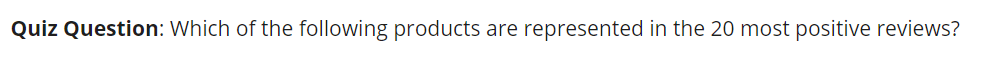

In [403]:
df_test3.sort_values('probability',ascending=False).iloc[0:20]
## First, it will sort the Probability values in the descending order, from that it will take 20 values

,name,review,rating,review_clean,sentiments,probability
97325,Freemie Hands-Free Concealable Breast Pump Col...,I absolutely love this product. I work as a C...,5,I absolutely love this product I work as a Cu...,1,1.0
50315,"P'Kolino Silly Soft Seating in Tias, Green",I've purchased both the P'Kolino Little Reader...,4,Ive purchased both the PKolino Little Reader C...,1,1.0
147949,"Baby Jogger City Mini GT Single Stroller, Shad...","Amazing, Love, Love, Love it !!! All 5 STARS a...",5,Amazing Love Love Love it All 5 STARS all the...,1,1.0
22586,"Britax Decathlon Convertible Car Seat, Tiffany",I researched a few different seats to put in o...,4,I researched a few different seats to put in o...,1,1.0
52631,Evenflo X Sport Plus Convenience Stroller - Ch...,After seeing this in Parent's Magazine and rea...,5,After seeing this in Parents Magazine and read...,1,1.0
168081,Buttons Cloth Diaper Cover - One Size - 8 Colo...,"We are big Best Bottoms fans here, but I wante...",4,We are big Best Bottoms fans here but I wanted...,1,1.0
87017,Baby Einstein Around The World Discovery Center,I am so HAPPY I brought this item for my 7 mon...,5,I am so HAPPY I brought this item for my 7 mon...,1,1.0
114796,"Fisher-Price Cradle 'N Swing, My Little Snuga...",My husband and I cannot state enough how much ...,5,My husband and I cannot state enough how much ...,1,1.0
140816,"Diono RadianRXT Convertible Car Seat, Plum",I bought this seat for my tall (38in) and thin...,5,I bought this seat for my tall 38in and thin 2...,1,1.0
66059,"Evenflo 6 Pack Classic Glass Bottle, 4-Ounce",It's always fun to write a review on those pro...,5,Its always fun to write a review on those prod...,1,1.0


## Quiz
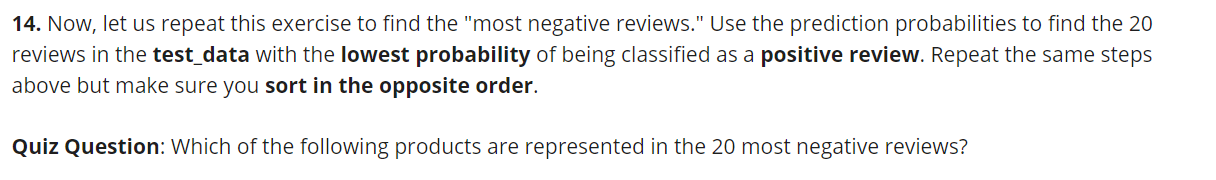

In [404]:
## Quiz Question: Which of the following products are represented in the 20 most negative reviews?
df_test3.sort_values('probability',ascending=True).iloc[0:20]
## First, it will sort the Probability values in the ascending order, from that it will take 20 values

,name,review,rating,review_clean,sentiments,probability
16042,Fisher-Price Ocean Wonders Aquarium Bouncer,We have not had ANY luck with Fisher-Price pro...,2,We have not had ANY luck with FisherPrice prod...,-1,8.418388e-16
120209,Levana Safe N'See Digital Video Baby Monitor w...,This is the first review I have ever written o...,1,This is the first review I have ever written o...,-1,1.603538e-15
77072,Safety 1st Exchangeable Tip 3 in 1 Thermometer,I thought it sounded great to have different t...,1,I thought it sounded great to have different t...,-1,8.113447e-14
48694,Adiri BPA Free Natural Nurser Ultimate Bottle ...,I will try to write an objective review of the...,2,I will try to write an objective review of the...,-1,9.809406e-14
155287,VTech Communications Safe &amp; Sounds Full Co...,"This is my second video monitoring system, the...",1,This is my second video monitoring system the ...,-1,1.920025e-13
94560,The First Years True Choice P400 Premium Digit...,Note: we never installed batteries in these un...,1,Note we never installed batteries in these uni...,-1,3.369832e-13
53207,Safety 1st High-Def Digital Monitor,We bought this baby monitor to replace a diffe...,1,We bought this baby monitor to replace a diffe...,-1,3.279231e-11
81332,Cloth Diaper Sprayer--styles may vary,I bought this sprayer out of desperation durin...,1,I bought this sprayer out of desperation durin...,-1,3.333844e-11
10677,Philips AVENT Newborn Starter Set,"It's 3am in the morning and needless to say, t...",1,Its 3am in the morning and needless to say thi...,-1,9.455415e-11
113995,Motorola Digital Video Baby Monitor with Room ...,DO NOT BUY THIS BABY MONITOR!I purchased this ...,1,DO NOT BUY THIS BABY MONITORI purchased this m...,-1,9.623696e-11


### 15) Compute accuracy of the classifier

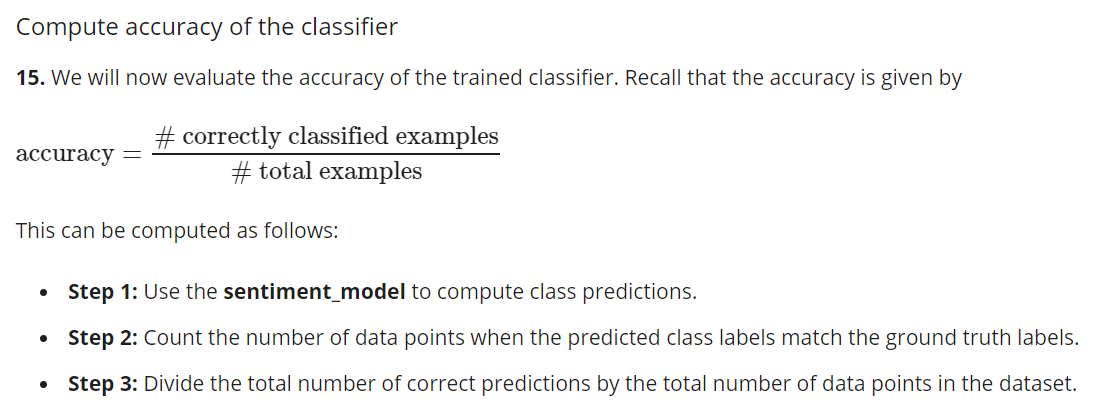

In [405]:
def Get_Classification_Accuracy(model,data,true_labels):
    predictions = model.predict(data)     # Predict the output from the model
    #print('Predictions : ',predictions)
    
    correctly_predicted  = sum(predictions==true_labels) # taking the correct predictions by comparing with the data
    #print('Correctly predicted : ',correctly_predicted)
    
    accuracy = correctly_predicted/len(true_labels) # correctly predicted/total samples
    return accuracy

In [406]:
sample_test_data

,name,review,rating,review_clean,sentiments
59,Our Baby Girl Memory Book,Absolutely love it and all of the Scripture in...,5,Absolutely love it and all of the Scripture in...,1
71,Wall Decor Removable Decal Sticker - Colorful ...,Would not purchase again or recommend. The dec...,2,Would not purchase again or recommend The deca...,-1
91,New Style Trailing Cherry Blossom Tree Decal R...,Was so excited to get this product for my baby...,1,Was so excited to get this product for my baby...,-1


In [407]:
# Lets compute the accuracy on the sample_test_data
print('The Accuracy is : ',
      Get_Classification_Accuracy(sentiment_model,sample_test_matrix,sample_test_data['sentiments']))

The Accuracy is :  1.0


In [408]:
df_test.head()

,name,review,rating,review_clean,sentiments
9,"Baby Tracker&reg; - Daily Childcare Journal, S...",This has been an easy way for my nanny to reco...,4,This has been an easy way for my nanny to reco...,1
10,"Baby Tracker&reg; - Daily Childcare Journal, S...",I love this journal and our nanny uses it ever...,4,I love this journal and our nanny uses it ever...,1
16,Nature's Lullabies First Year Sticker Calendar,"I love this little calender, you can keep trac...",5,I love this little calender you can keep track...,1
20,Nature's Lullabies Second Year Sticker Calendar,I had a hard time finding a second year calend...,5,I had a hard time finding a second year calend...,1
28,"Lamaze Peekaboo, I Love You","One of baby's first and favorite books, and it...",4,One of babys first and favorite books and it i...,1


In [409]:
# Lets compute the accuracy on the test_data
print('The Accuracy is : ',
      Get_Classification_Accuracy(sentiment_model,test_matrix,df_test['sentiments']))

The Accuracy is :  0.9322954163666907


## Quiz question
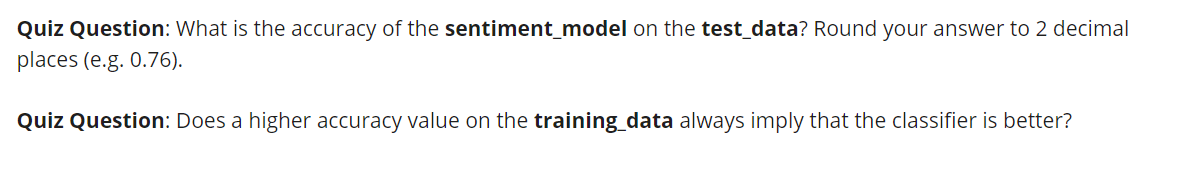

In [410]:
## The accuracy is 0.93
## No

### 16) Learn another classifier with fewer words

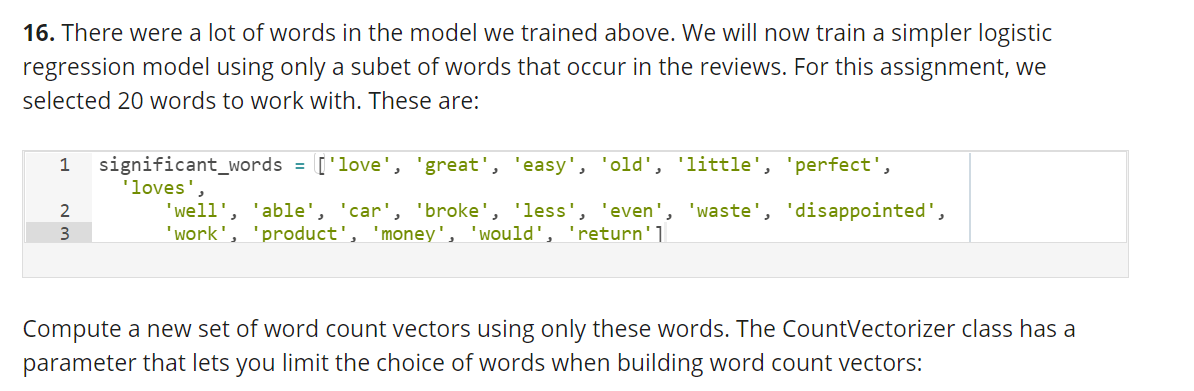

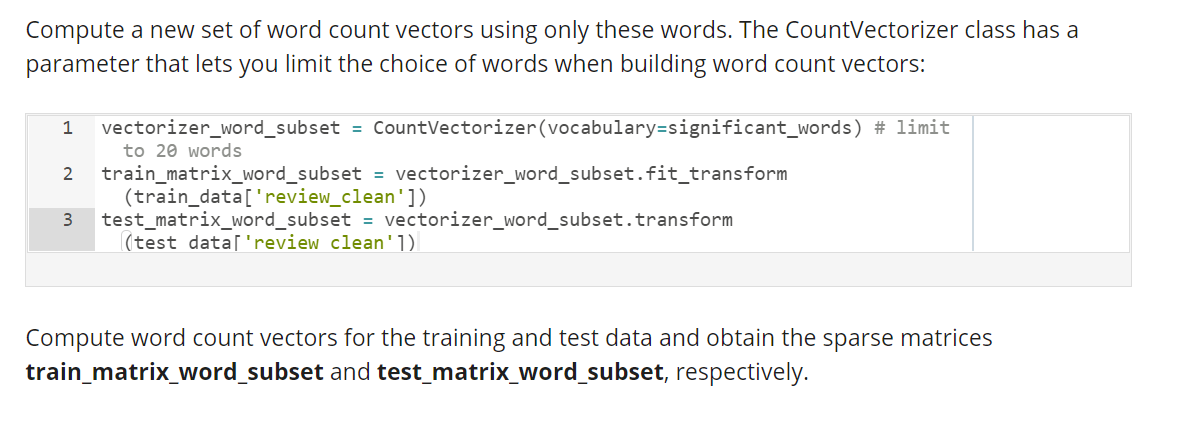

In [411]:
significant_words = ['love', 'great', 'easy', 'old', 'little', 'perfect', 'loves', 
      'well', 'able', 'car', 'broke', 'less', 'even', 'waste', 'disappointed', 
      'work', 'product', 'money', 'would', 'return']

In [412]:
print(len(significant_words))

20


In [413]:
vectorizer_word_subset   = CountVectorizer(vocabulary=significant_words)
train_matrix_word_subset = vectorizer_word_subset.fit_transform(df_train['review_clean'])
test_matrix_word_subset  = vectorizer_word_subset.transform(df_test['review_clean'])

In [414]:
train_bag_of_words = pd.DataFrame(train_matrix_word_subset.toarray(),columns=vectorizer_word_subset.vocabulary_.keys())
train_bag_of_words

,love,great,easy,old,little,perfect,loves,well,able,car,broke,less,even,waste,disappointed,work,product,money,would,return
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,2,0,0,0
3,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133411,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0
133412,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
133413,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0
133414,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [415]:
print('The significant words are : ')
list(train_bag_of_words.columns)

The significant words are : 


['love',
 'great',
 'easy',
 'old',
 'little',
 'perfect',
 'loves',
 'well',
 'able',
 'car',
 'broke',
 'less',
 'even',
 'waste',
 'disappointed',
 'work',
 'product',
 'money',
 'would',
 'return']

In [416]:
# Lets see how the data looks like
df_train.iloc[0]['review_clean']

'it came early and was not disappointed i love planet wise bags and now my wipe holder it keps my osocozy wipes moist and does not leak highly recommend it'

### 17) Train a logistic regression model on a subset of data

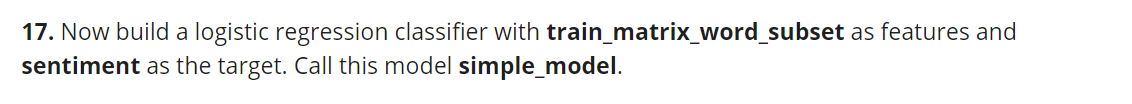

In [417]:
simple_model = LogisticRegression(solver='liblinear',n_jobs=1)
simple_model.fit(train_matrix_word_subset,df_train['sentiments'])
print(simple_model)

LogisticRegression(n_jobs=1, solver='liblinear')


In [418]:
# Lets check the accuracy of the simple_model using the test_data 
print('Accuracy after applying few vocabularies : ',
      Get_Classification_Accuracy(simple_model,test_matrix_word_subset,df_test['sentiments']))

Accuracy after applying few vocabularies :  0.8693604511639069


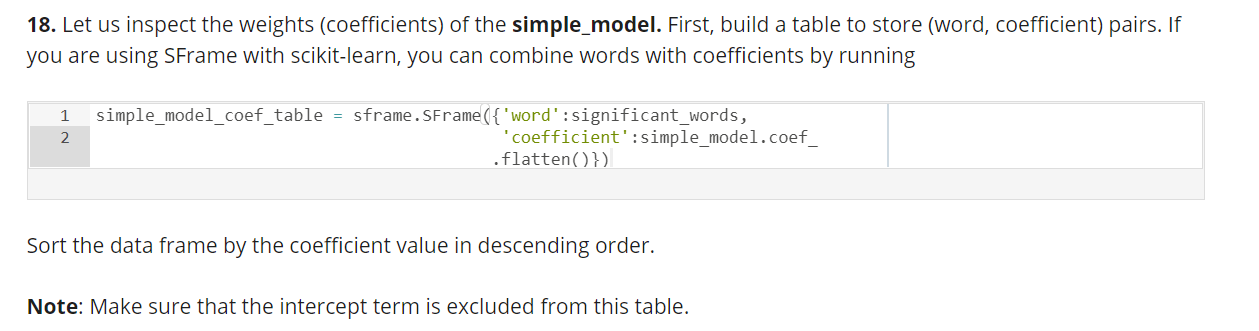

In [419]:
# Table to store the words and coefficient pairs
simple_model_coef_table = pd.DataFrame({'word':significant_words,
                                'coefficient':simple_model.coef_.flatten()})
simple_model_coef_table

,word,coefficient
0,love,1.363621
1,great,0.943992
2,easy,1.192532
3,old,0.085508
4,little,0.520181
5,perfect,1.509804
6,loves,1.673063
7,well,0.503754
8,able,0.190906
9,car,0.058853


In [420]:
# Let's sort the coefficients (in descending order) by the value 
# to obtain the coefficients with the most positive effect on the sentiment.
simple_model_coef_table.sort_values('coefficient',ascending=False)

,word,coefficient
6,loves,1.673063
5,perfect,1.509804
0,love,1.363621
2,easy,1.192532
1,great,0.943992
4,little,0.520181
7,well,0.503754
8,able,0.190906
3,old,0.085508
9,car,0.058853


## Quiz
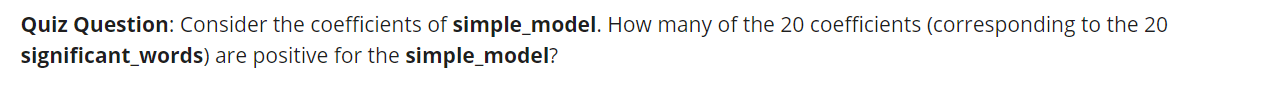

In [421]:
print('Out of 20 coefficients the positives are : ',
      simple_model_coef_table[simple_model_coef_table['coefficient']>0])

Out of 20 coefficients the positives are :        word  coefficient
0     love     1.363621
1    great     0.943992
2     easy     1.192532
3      old     0.085508
4   little     0.520181
5  perfect     1.509804
6    loves     1.673063
7     well     0.503754
8     able     0.190906
9      car     0.058853


In [422]:
print('Out of 20 coefficients the total number of positives are : ',
      len(simple_model_coef_table[simple_model_coef_table['coefficient']>0]))

Out of 20 coefficients the total number of positives are :  10


## Quiz Question: 
Are the positive words in the simple_model also positive words in the sentiment_model?

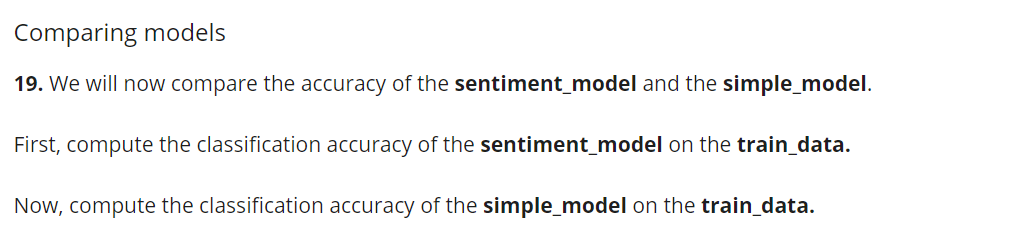

In [423]:
sentiment_accuracy_sentiment_model_train = Get_Classification_Accuracy(
                                        sentiment_model,train_matrix,df_train['sentiments'])
simple_accuracy_simple_model_train = Get_Classification_Accuracy(
                                        simple_model,train_matrix_word_subset,df_train['sentiments'])

In [424]:
print('The accuracy of the sentiment model on the train data : ',
                          sentiment_accuracy_sentiment_model_train)
print('The accuracy of the simple model on the train data    : ',
                          simple_accuracy_simple_model_train)

The accuracy of the sentiment model on the train data :  0.9685045271931403
The accuracy of the simple model on the train data    :  0.8668225700065959


## Quiz question
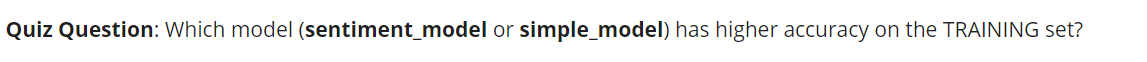

In [425]:
if (sentiment_accuracy_sentiment_model_train>simple_accuracy_simple_model_train):
    print('Sentiment Model has the highest accuracy')
else:
    print('Simple Model has the highest accuracy')

Sentiment Model has the highest accuracy


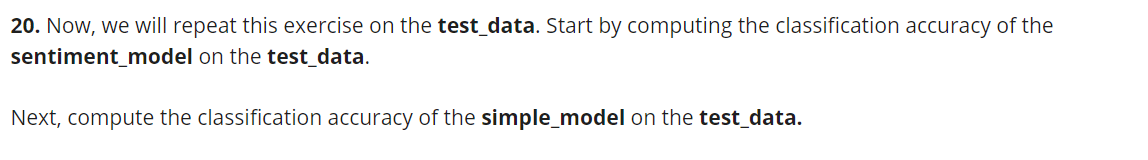

In [426]:
sentiment_accuracy_sentiment_model_test = Get_Classification_Accuracy(
                                        sentiment_model,test_matrix,df_test['sentiments'])
simple_accuracy_simple_model_test       = Get_Classification_Accuracy(
                                        simple_model,test_matrix_word_subset,df_test['sentiments'])

In [427]:
print('The accuracy of the sentiment model on the train data : ',
                          sentiment_accuracy_sentiment_model_train)
print('The accuracy of the simple model on the train data    : ',
                          simple_accuracy_simple_model_train)

The accuracy of the sentiment model on the train data :  0.9685045271931403
The accuracy of the simple model on the train data    :  0.8668225700065959


In [428]:
if (sentiment_accuracy_sentiment_model_test>simple_accuracy_simple_model_test):
    print('Sentiment Model has the highest accuracy')
else:
    print('Simple Model has the highest accuracy')

Sentiment Model has the highest accuracy


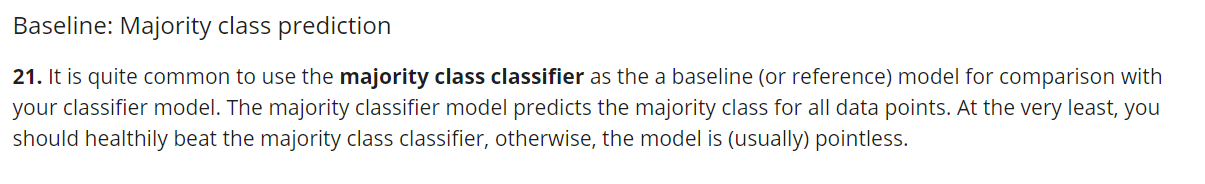

In [429]:
num_positive_train = len(df_train[df_train['sentiments']==1])
num_negative_train = len(df_train[df_train['sentiments']==-1])

print("Positive label : {} and the negative label : {}".format(num_positive_train,num_negative_train))

Positive label : 112164 and the negative label : 21252


In [430]:
num_positive_test = len(df_test[df_test['sentiments']==1])
num_negative_test = len(df_test[df_test['sentiments']==-1])

print("Positive label : {} and the negative label : {}".format(num_positive_test,num_negative_test))

Positive label : 28095 and the negative label : 5241


In [431]:
accuracy_majority_class_classifier_test  = num_positive_test/(num_positive_test   + num_negative_test)
accuracy_majority_class_classifier_train = num_positive_train/(num_positive_train + num_negative_train)

In [432]:
print('Baseline Majority class classifier(train) : ',accuracy_majority_class_classifier_train)
print('Baseline Majority class classifier(test)  : ',accuracy_majority_class_classifier_test)

Baseline Majority class classifier(train) :  0.8407087605684476
Baseline Majority class classifier(test)  :  0.8427825773938085


## Quiz question
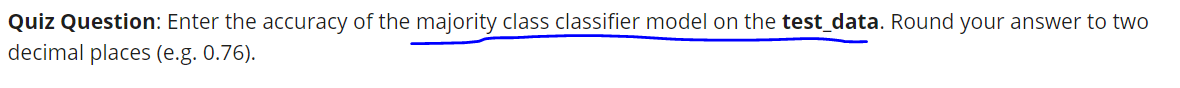

In [433]:
print('Baseline Majority class classifier(test)  : ',accuracy_majority_class_classifier_test)

Baseline Majority class classifier(test)  :  0.8427825773938085


## Quiz question
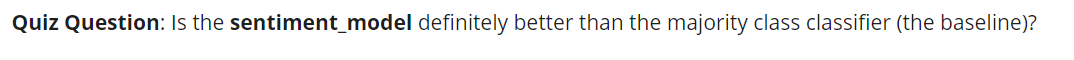

In [435]:
if (sentiment_accuracy_sentiment_model_test>accuracy_majority_class_classifier_test):
    print('Sentiment model is better than the majority class classifier')
else:
    print('Sentiment model is not better than the majority class classifier')

Sentiment model is better than the majority class classifier
